## `Pastikan klik 'File > Save a copy in Drive' sebelum memulai pengerjaan`

# Pengaplikasian Python dalam Data Analysis

## Tujuan

Setelah menyelesaikan lab ini, kamu akan mampu untuk:

*   Pengelolaan data `date`
*   Penggunaan fungsi `sort_values`
*   Penggunaan fungsi `pivot_table` & `groupby`
*   Membuat dan menggunakan fungsi sederhana pada `DataFrame`
*   Membuat visualisasi secara sederhana dengan menggunakan `matplotlib`
*   Menjalankan SQL di Colab dengan `sqlite3`

In [ ]:
#Mengimpor Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Mengimpor dataset
URL = 'https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/tokopaedi.csv'
df = pd.read_csv(URL)
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
#Menampilkan gambaran data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9994 non-null   int64  
 1   order_id       9994 non-null   object 
 2   order_date     9994 non-null   object 
 3   ship_date      9994 non-null   object 
 4   ship_mode      9994 non-null   object 
 5   customer_id    9994 non-null   object 
 6   customer_name  9994 non-null   object 
 7   segment        9994 non-null   object 
 8   country        9994 non-null   object 
 9   city           9994 non-null   object 
 10  state          9994 non-null   object 
 11  postal_code    9994 non-null   int64  
 12  region         9994 non-null   object 
 13  product_id     9994 non-null   object 
 14  category       9994 non-null   object 
 15  subcategory    9994 non-null   object 
 16  product_name   9994 non-null   object 
 17  sales          9994 non-null   float64
 18  quantity

## Pengelolaan Data `Date`

In [ ]:
#Mengubah tipe kolom Date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['ship_date']= pd.to_datetime(df['ship_date'])
df.dtypes

row_id                    int64
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
subcategory              object
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
dtype: object

In [ ]:
#Membuat kolom tambahan untuk day, month, month_num
df['day']=df['order_date'].dt.day_name()
df['month']=df['order_date'].dt.month_name()
df['month_num']=df['order_date'].dt.month
df['year']=df['order_date'].dt.year
df.head(5)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,subcategory,product_name,sales,quantity,discount,profit,day,month,month_num,year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Tuesday,November,11,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Tuesday,November,11,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Sunday,June,6,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Sunday,October,10,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Sunday,October,10,2015


In [ ]:
#Latihan: Filter berdasarkan bulan October tahun 2015
df1 = df[(df['year']== 2015)]
df1.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,subcategory,product_name,sales,quantity,discount,profit,day,month,month_num,year
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Sunday,October,10,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Sunday,October,10,2015
14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580,Sunday,November,11,2015
15,16,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160,Sunday,November,11,2015
24,25,CA-2015-106320,2015-09-25,2015-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649,Friday,September,9,2015


##Penggunaan Fungsi `sort_values`

Formula:

nama_variabel = nama_dataframe`.sort_values(by=`[nama_kolom_1,nama_kolom_2],`ascending=`[urutan_1   ,    urutan_2])


In [ ]:
#Penggunaan sort_values
df_sort = df.sort_values(by=['order_date','quantity'],ascending=[False,False]) #filtering
df_sort[['order_date','quantity']].head(5) #selecting

,order_date,quantity
907,2017-12-30,7
906,2017-12-30,4
908,2017-12-30,3
5096,2017-12-30,3
646,2017-12-30,2


In [ ]:
#Latihan: Urutkan berdasarkan ship_date dari paling awal dan category secara alfabet.
#Tampilkan untuk 10 data paling atas, dengan menampilkan kolom: country,category,ship_date
df_sort = df.sort_values(by=['ship_date','category'],ascending=[True,True])
df_sort[['country','category','ship_date']].head(10)

,country,category,ship_date
7184,United States,Office Supplies,2014-01-07
7984,United States,Office Supplies,2014-01-07
740,United States,Office Supplies,2014-01-08
741,United States,Office Supplies,2014-01-08
742,United States,Office Supplies,2014-01-08
5331,United States,Office Supplies,2014-01-08
7478,United States,Furniture,2014-01-10
7479,United States,Office Supplies,2014-01-10
7480,United States,Office Supplies,2014-01-10
7483,United States,Office Supplies,2014-01-10


##Penggunaan fungsi `pivot_table` & `groupby`

### `pivot_table`

**Formula:**

nama_variable  =  `pd.pivot_table`(nama_dataframe`, values=`['kolom_nilai']`,index=`['baris']`,columns=`['header']`,aggfunc=np.`jenis_agregasi)

Output: `DataFrame`

In [ ]:
df_pivot = pd.pivot_table(df,values=['quantity'],index=['region'],columns=['category'],aggfunc=np.sum)
df_pivot

quantity                           
category Furniture Office Supplies Technology
region                                       
Central       1827            5409       1544
East          2214            6462       1942
South         1291            3800       1118
West          2696            7235       2335

In [ ]:
#Buatlah tabel pivot untuk: index = country, header/kolom = city, nilainya = penjumlahan dari profit
pd.pivot_table(df,values=['profit'],index=['country'],columns=['city'],aggfunc=np.sum)

profit                                                    \
city          Aberdeen Abilene     Akron Albuquerque Alexandria    Allen   
country                                                                    
United States     6.63 -3.7584 -186.6356    634.0881   318.6183 -39.8775   

                                                      ...                     \
city          Allentown Altoona  Amarillo    Anaheim  ... Wilmington  Wilson   
country                                               ...                      
United States -226.4504 -1.1835 -387.9683  1234.0036  ...  1947.7019 -14.336   

                                                                            \
city           Woodbury Woodland Woodstock Woonsocket    Yonkers      York   
country                                                                      
United States  196.0962  33.3848   79.9929    78.6791  2767.7557 -102.1692   

                                 
city          Yucaipa      Yuma  
country                          
United States  13.208 -465.9909  

[1 rows x 531 columns]

In [ ]:
#index = segment , vslue nys profit , coloumns city , agg AVG
df_pivot1 = pd.pivot_table(df,values=['profit'], index=['city'],columns=['segment'],aggfunc=np.avg)
df_pivot1

AttributeError: ignored

### `groupby`

**Formula:**

nama variabel = nama_dataframe`.groupby(by=`['kolom_1'  ,   'kolom_2'])['kolom_agregasi']`.`jenis_agregasi()

Output: `series`


In [ ]:
df_groupby = df.groupby(by=["month_num","month"])["profit"].sum()

In [ ]:
#merubah output groupby menjadi DataFrame
df_groupby_new = pd.DataFrame(df_groupby.reset_index(name='Total')) #reset_index untuk memberi header pada kolom hasil groupby
df_groupby_new

,month_num,month,Total
0,1,January,9134.4461
1,2,February,10294.6107
2,3,March,28594.6872
3,4,April,11587.4363
4,5,May,22411.3078
5,6,June,21285.7954
6,7,July,13832.6648
7,8,August,21776.9384
8,9,September,36857.4753
9,10,October,31784.0413


In [ ]:
#Buatlah dengan fungsi groupby, top 5 city penghasil profit paling besar selama 2015
df_groupby = df[df['year'] == 2015]
df_groupby = df.groupby(by=["city"])["profit"].sum()
df_groupby = pd.DataFrame(df_groupby.reset_index(name='profit'))
df_groupby = df.sort_values(by=['profit'],ascending=[False])

df_groupby[['city','profit']].head(5)

,city,profit
6830,Lafayette,8399.9760
8153,Seattle,6719.9808
4196,Newark,5039.9856
9040,Detroit,4946.3700
4104,Minneapolis,4630.4755


##Membuat dan menggunakan fungsi sederhana pada DataFrame

Formula:

`def` nama_fungsi `(`nilai`):`

    kondisi



In [ ]:
#Membuat suatu fungsi
def condition(value):
    if value > 2:
      return 'High'
    elif value == 2:
      return 'Medium'
    else:
        return 'Low'

In [ ]:
#Pengaplikasian fungsi
df['status'] = df['quantity'].apply(condition)
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,product_name,sales,quantity,discount,profit,day,month,month_num,year,status
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Tuesday,November,11,2016,Medium
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Tuesday,November,11,2016,High
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Sunday,June,6,2016,Medium
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Sunday,October,10,2015,High
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Sunday,October,10,2015,Medium


In [ ]:
#Buatlah suatu kolom baru yang bernama ship_delay yang dapat menyatakan bahwa apabila waktu pengiriman <= 4 hari dari tanggal order maka 'Good' selain itu maka 'Bad'
def kondisi (x) :
  if x <= 4 :
    return 'Good'
  else :
    return 'Bad'

In [ ]:
df['ship_delay']= df['order_date'] - df['ship_date']
df['diff_delay_num'] = df['ship_delay'].apply(lambda x: int(x.total_seconds() / (24 * 60 * 60)))
df['ship_status'] = df['diff_delay_num'].apply(kondisi)
df.head()


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,discount,profit,day,month,month_num,year,status,ship_delay,diff_delay_num,ship_status
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0.00,41.9136,Tuesday,November,11,2016,Medium,-3 days,-3,Good
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0.00,219.5820,Tuesday,November,11,2016,High,-3 days,-3,Good
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,0.00,6.8714,Sunday,June,6,2016,Medium,-4 days,-4,Good
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,0.45,-383.0310,Sunday,October,10,2015,High,-7 days,-7,Good
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,0.20,2.5164,Sunday,October,10,2015,Medium,-7 days,-7,Good


## Membuat visualisasi secara sederhana dengan menggunakan `matplotlib`

<ipython-input-47-5dc48a179ebd>:2: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  df_groupby_new.plot(x='month',


<Axes: title={'center': 'Monthly Total Quantity'}, xlabel='Month', ylabel='Total'>

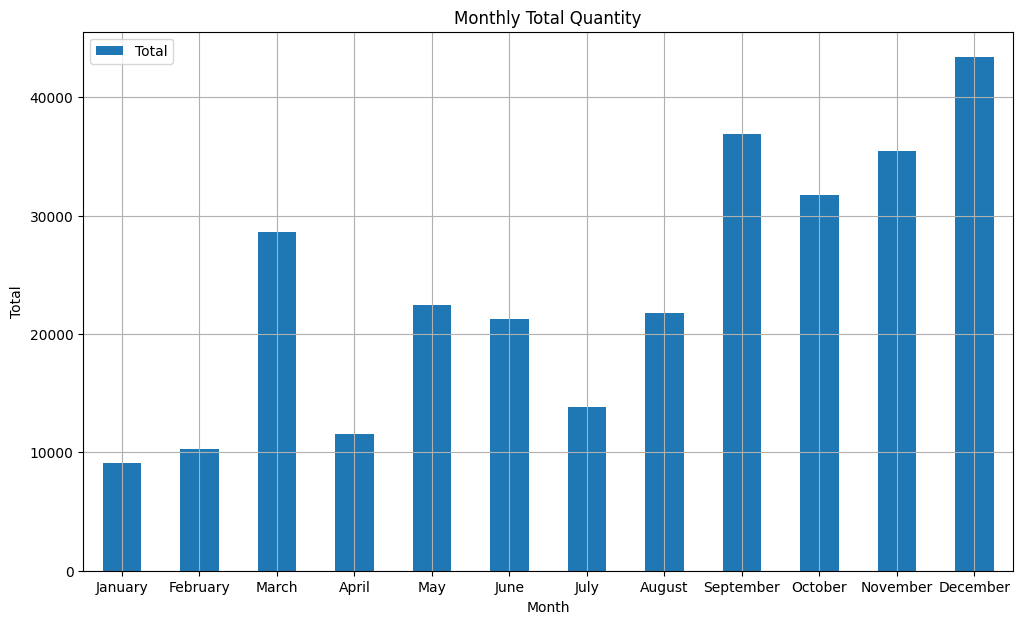

In [ ]:
#Membuat grafik
df_groupby_new.plot(x='month',
           y=['Total'],
           kind='bar',
           grid = True,
           xlabel = 'Month',
           ylabel = 'Total',
           figsize=(12,7),
           rot = 0, #Rotasi
           title = 'Monthly Total Quantity',
           table = False,
           sort_columns = False,
           secondary_y = False)

## Menjalankan SQL di Colab dengan `sqlite3`

In [ ]:
#Menjalankan SQL di Colab
from sqlite3 import connect
conn = connect(':memory:')
df.to_sql('tokopaedi',conn, index=False, if_exists='replace')

<ipython-input-43-941174d18c35>:4: UserWarning: the 'timedelta' type is not supported, and will be written as integer values (ns frequency) to the database.
  df.to_sql('tokopaedi',conn, index=False, if_exists='replace')


9994

In [ ]:
#Query SQL
df_sql = pd.read_sql("""
SELECT
    tokopaedi.city,
    sum(tokopaedi.profit) profit
from
    tokopaedi
group by
    1
order by
    2 desc
limit 10
""", conn)
df_sql

,city,profit
0,New York City,62036.9837
1,Los Angeles,30440.7579
2,Seattle,29156.0967
3,San Francisco,17507.3854
4,Detroit,13181.7908
5,Lafayette,10018.3876
6,Jackson,7581.6828
7,Atlanta,6993.6629
8,Minneapolis,6824.5846
9,San Diego,6377.1960


#Minitask

Tampilkan TOP 5 Category selama 2016 dengan berdasarkan nilai profit yang paling tinggi. Tampilkan juga dengan bar diagram.

<ipython-input-48-2ecf97823c0a>:18: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  df_sort2.head(5).plot(x='city',


<Axes: title={'center': 'TOP 5 City (2016)'}, xlabel='Month', ylabel='Total'>

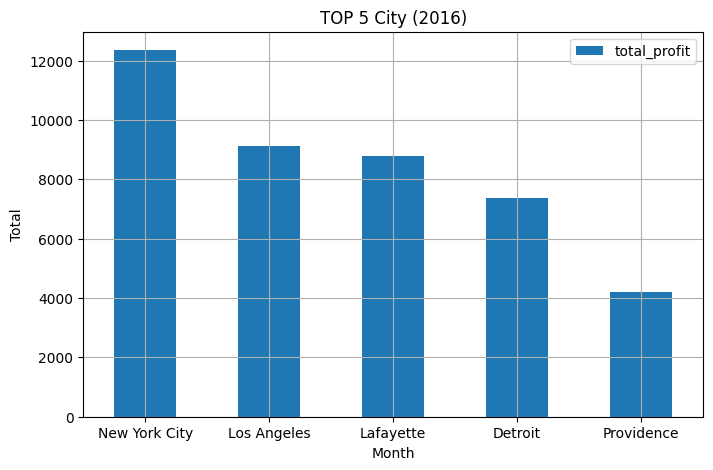

In [ ]:
#Filter di tahun 2016
year = df['year']==2016
df_filter = df[year]

#Memilih tabel City dan profit (secara total dengan "sum")
df_groupby = df_filter.groupby(by=["city"])["profit"].sum()

#Mengganti nama "total" dgn "total_profit"
df_groupby2 = pd.DataFrame(df_groupby.reset_index(name='total_profit'))

#Mensortir dari yang paling besar berdasarkan total profit
df_sort2 = df_groupby2.sort_values(by=['total_profit'],ascending=[False])

#..dan dijadikan top 5
df_sort2.head(5)

#Pembuatan tabel
df_sort2.head(5).plot(x='city',
           y=['total_profit'],
           kind='bar',
           grid = True,
           xlabel = 'Month',
           ylabel = 'Total',
           figsize=(8,5),
           rot = 0, #Rotasi
           title = 'TOP 5 City (2016)',
           table = False,
           sort_columns = False,
           secondary_y = False)